Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Here we are mounting our drive because our dataset is in the drive

Mounted at /content/drive


In [ ]:
import keras as ke
import tensorflow as tf
import sys


import json
import math
import keras
#Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. 
#It also supports multiple backend neural network computation
import keras.backend as K



import numpy as np
#NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import pickle #used to convert python object into byte stream
import cv2 #used to solve computer vision problems or do image processing
import pandas as pd
#pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive
import os
#The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
from os import listdir #list the entities that are present in a directory given by the path
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
#TensorFlow provides a collection of workflows to develop and train models using Python or JavaScript, and to easily deploy in the cloud, on-prem, in the browser,
# or on-device no matter what language you use. The tf. data API enables you to build complex input pipelines from simple, reusable pieces.

from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import layers, optimizers
from tensorflow.keras.applications import MobileNetV2
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.losses import categorical_crossentropy
#from keras.optimizers import adam, sgd

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D

from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

In [ ]:
print(tf.__version__) 
print(keras.__version__) 
#here we are checking the version of tensorflow and keras that we have downloaded

2.8.2
2.8.0


In [ ]:
EPOCHS = 50 #it means the number of times we pass the data through the model to improve the efficiency of the code
#why do we need epoch??
#if we do maths problem once it will somewhat clears to you but if we do the same problem 10 times then the solution will be so clear.
#here we are passing the data 50 times so that the model learns from the data 
#and it will tell us that if the leaf is looking like this it will have this deasise and so on.

INIT_LR = 1e-3
BS = 42 #batch size
#Generally batch size of 42 or 25 is good, with epochs = 100 unless you have large dataset. in case of large dataset you can go with batch size of 10 with epochs b/w 50 to 100.
#default_image_size = tuple((256, 256))

default_image_size = tuple((224, 224))
#it means height and width
#because we need to convert everthing to array

image_size = 0
directory_root ='/content/drive/MyDrive/Kaggle/DATASET/data'
width=224
height=224
depth=3

**Converting Image Into the Array**

In [ ]:
# function to convert images to array
#why do we need to convert it because a computer doesnot know what an image it it only know about the binary info like height width and dept

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
          #  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

*Fetching the images in directory*

In [ ]:
#Fetch images in the directory

image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)


    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        copy=listdir(f"{directory_root}/{plant_folder}")
        plant_list = []
        print(plant_disease_folder_list)
        for disease_folder in copy :
            # remove .DS_Store from list
            print(disease_folder)
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)
        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:350]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")
    # in this block of code we have provided the path of the directory where my data set is present 
    # and what it will return the list of the entities that are present in my diretory 
    #below is the example

[INFO] Loading images ...
['fresh cotton leaf', 'diseased_cotton_leaf', '.ipynb_checkpoints', 'diseased_cotton_plant', 'fresh_cotton_plant']
fresh cotton leaf
diseased_cotton_leaf
.ipynb_checkpoints
diseased_cotton_plant
fresh_cotton_plant
[INFO] Processing fresh cotton leaf ...
[INFO] Processing diseased_cotton_leaf ...
[INFO] Processing .ipynb_checkpoints ...
[INFO] Processing diseased_cotton_plant ...
[INFO] Processing fresh_cotton_plant ...
['test data comp files', 'fresh cotton plant', 'fresh cotton leaf', 'diseased cotton plant', 'diseased cotton leaf']
test data comp files
fresh cotton plant
fresh cotton leaf
diseased cotton plant
diseased cotton leaf
[INFO] Processing test data comp files ...
[INFO] Processing fresh cotton plant ...
[INFO] Processing fresh cotton leaf ...
[INFO] Processing diseased cotton plant ...
[INFO] Processing diseased cotton leaf ...
['diseased cotton leaf', 'fresh cotton leaf', 'fresh cotton plant', 'diseased cotton plant']
diseased cotton leaf
fresh co

In [ ]:
#get size of the processed images
image_size = len(image_list)
print(image_size)
print(len(label_list))

1698
1698


In [ ]:
image_list[0].shape


(224, 224, 3)

Transform Image Labels using Scikit Learn's LabelBinarizer

In [ ]:
label_binarizer = LabelBinarizer()
#it assign a unique value or number each label in a categorie can feature
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
#it help in saving the data in the disk 
#.pkl is the extension of it like we save python file as .py file so these are .pkl files 
n_classes = len(label_binarizer.classes_)

**Print the number of classes**

In [ ]:
print(n_classes)#it means the number of classes in training dataset that have access to model

8


*Print the classes*

In [ ]:

print(label_binarizer.classes_)
#here we print the labels

['diseased cotton leaf' 'diseased cotton plant' 'diseased_cotton_leaf'
 'diseased_cotton_plant' 'fresh cotton leaf' 'fresh cotton plant'
 'fresh_cotton_plant' 'test data comp files']


In [ ]:
print(np.array(image_list[0]).dtype)

float32


In [ ]:
image_list = np.array(image_list, dtype=np.float32)
#here we simply convert the image into an array

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(image_list, image_labels, test_size=0.2, random_state = 42) 
#changed random state from 10 to 24
#here we need to split the data set into two parts i.e one you will used for trainig and the one is used for the validation 
#what is x train?
#it is data set used for trainig
#what is y train?
#labels that are associated with the trainig data set
# x test the data used for testing and y test is labels as attached to the test data 
# here test size means 0.2 means 20 percent of data will be used as for testing and 80 percent of data is used for training
# what is random stuff?
#if you dont specify a fixed rabdom state every time you run the code there will be different values for the training set and testing set 
#but if you specify a fixed random state then no matters how many times you run the code the test data and the trainig data will be the same



[INFO] Spliting data to train, test


In [ ]:
aug = ImageDataGenerator(
            rotation_range=25, width_shift_range=0.1,
          height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
#what does it do is it allows you to augment(greater by adding to it) the image in real time even when the model is under training. 
#it allows you to pass random transformation to the image to each of the image before passing it through the model  

**Convolutional Neural Network**

![](https://miro.medium.com/max/875/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False

def nvidia_model():
    model = Sequential()
    model.add(resnet)
    #what model sequential do is it stacks up sequential layers of the network in order of input to output
    #we know that cnn is has layers it is like funnel each layers  has neurons and there is data from neurons to all neurons output etc. 

    #comment out
   # model.add(MaxPooling2D(pool_size=(2, 2)))
   # model.add(Dropout(0.5))
    
    model.add(Flatten())
    #before we pass the data to next layer we need to flatten the data in one dimension 
    
  
    model.add(Dense(512, activation='relu'))
    # activation is an mathematical equation that determines the output of a neural network
    model.add(Dropout(0.2))
    # Dropout it helps in preventing us from overfitting 
  
      
    
    model.add(Dense(8,activation='softmax'))
    # what is dense do??
    #the dense layer takes output from all the neurons of a layer from the previous layer and it takes all the output and provides these output to all the neurons of the brain of the next layer 
    #all these neurons will provide each of these outputs for the layer which is next to it
    
    optimizer = Adam(lr=1e-3)#lr is learning rate.
    # The range of values to consider for the learning rate is less than 1.0 and greater than 10^-6.
    # A traditional default value for the learning rate is 0.1 or 0.01, and this may represent a good starting point on your problem.
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
#this is  layering process that is going on.


model = nvidia_model()
print(model.summary())
#model summary will give me insight about the paramete.
#like how many trainable parameters it has and how many non trainable parameter it has.
#this is the overall summary of the data set.
#why do we have non trainable parameters
#In CNN there are layer layers which are hidden
#and in each layer there are mutliple layers of neurons and each neuron has data 
#when a layer goes hidden all the neurons kind of in it goes hidden so we cant train those data that are present in hidden neurons

#about Output shape in output below
#Assume that the size of each image is (32, 32, 3), as per the question.

#Keras then appends an extra dimension for processing multiple batches, i.e., to train multiple images in every step of a single epoch. Since batch size can vary, its size is represented by None. Hence, the input shape becomes (None, 32, 32, 3).

#Convolving a (32, 32) image with a (4, 4) filter, with strides and dilation rate of 1, and 'valid' padding, results in an output of size (32 - 4 + 1, 32 - 4 + 1) = (29, 29). Since you have 32 such filters, the output shape becomes (29, 29, 32).

#The default MaxPooling kernel has a shape of (2, 2) and strides of (2, 2). Applying that to a (29, 29) image results in an image of shape (((29 - 2)//2) + 1, ((29 - 2)//2) + 1)) = (14, 14).

#This pattern can be extended to all Conv2D and MaxPooling layers.

#The Flatten layer takes all pixels along all channels and creates a 1D vector (not considering batch size). Therefore, an input of (5, 5, 32) is flattened to (5 * 5 * 32) = 800 values.
 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               51380736  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 74,972,552
Trainable params: 52,439,560
Non-trainable params: 22,532,992
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss',verbose=1,save_best_only=True, mode='auto')

history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    epochs=2, verbose=1,
    steps_per_epoch=len(x_train) // BS,
    
    callbacks=[checkpoint]
    )
#here we have done 40 epochs 
#these are the accuracy of each epochs 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/2
32/32 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.7561
Epoch 1: val_loss improved from inf to 0.75302, saving model to model.h5
32/32 [==============================] - 300s 9s/step - loss: 0.7297 - accuracy: 0.7561 - val_loss: 0.7530 - val_accuracy: 0.7618
Epoch 2/2
32/32 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.7796
Epoch 2: val_loss improved from 0.75302 to 0.69246, saving model to model.h5
32/32 [==============================] - 287s 9s/step - loss: 0.6508 - accuracy: 0.7796 - val_loss: 0.6925 - val_accuracy: 0.7735


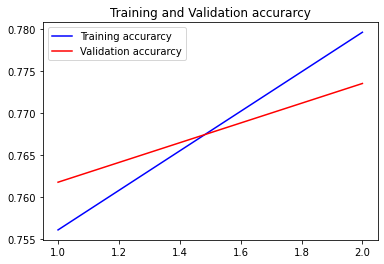

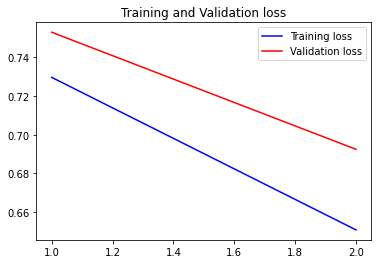

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation lossvv
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
#Validation this shows how valid the data is.
#as in the graph we can see that the traning accuracy is bit more than the validation accuracy 
#which is normal 
#lets take an example if in exam the same question that you have practice comes then the probability of solving it will increase but if 
#some new question will comes the probability of doing it right will decrease 
#so the traing set accuracy is more that the validation accuracy.


#again the losses in traing data is less than the lossed in validation data 
#it is kind of perfect fitting since the validation data loss and the traing data loss is nearly equal
#if validation loss>traing loss so it is overfitting
#else it would be underfitting
#overfitting can be correct by increasing the epoch and dropout and all.

Model Accuracy

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
11/11 [==============================] - 54s 5s/step - loss: 0.6925 - accuracy: 0.7735
Test Accuracy: 77.35294103622437


In [ ]:
from keras.models import load_model
model = load_model('model.h5')
# here we have loaded the data again

In [ ]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float32)
    print(np_image.dtype)
    np_image = np.expand_dims(np_image,0)
    print(np_image.shape)
    plt.imshow(plt.imread(image_path))
    result = np.argmax(model.predict(np_image), axis=-1)
    print(result)
    print((label_binarizer.classes_[result]))
    
    #here we have provided the validation data its like an input the model to see if it gives the right result

float32
(1, 224, 224, 3)
[0]
['diseased cotton leaf']


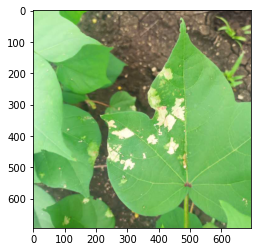

In [ ]:
predict_disease("/content/drive/MyDrive/Kaggle/DATASET/data/val/diseased_cotton_leaf/dis_leaf(100)_iaip.jpg")

In [ ]:
image=("/content/drive/MyDrive/Kaggle/DATASET/data/val/diseased_cotton_leaf/dis_leaf(100)_iaip.jpg")

float32
(1, 224, 224, 3)
[0]
['diseased cotton leaf']


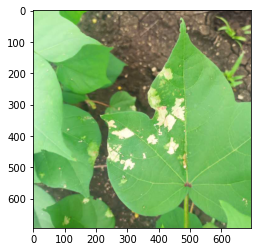

In [ ]:
predict_disease(image)

float32
(1, 224, 224, 3)
[1]
['diseased cotton plant']


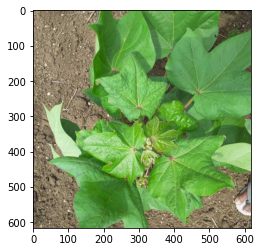

In [ ]:
predict_disease("/content/drive/MyDrive/Kaggle/DATASET/data/val/diseased_cotton_plant/dd(10)_iaip.jpg")

float32
(1, 224, 224, 3)
[3]
['fresh cotton plant']


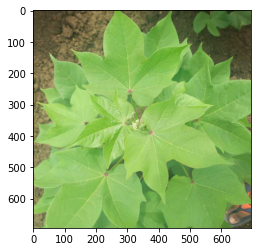

In [ ]:
predict_disease("/content/drive/MyDrive/Kaggle/DATASET/data/val/fresh_cotton_plant/dsd(140)_iaip.jpg")

In [ ]:
#convert keras model to tflite
model = tf.keras.models.load_model('model.h5')
converter =  tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("plant.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqda0s9r_/assets


INFO:tensorflow:Assets written to: /tmp/tmpqda0s9r_/assets


299503104

In [ ]:
model.save('model_cnn.h5')